In [1]:
# import libraries
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# declare tranformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
    ])

In [3]:
# get train and test directories
dirs = {
    'train': 'COVID-19 Radiography Database/train',
    'test': 'COVID-19 Radiography Database/test'
}
# prepare data-loaders
train_set = datasets.ImageFolder(root=dirs['train'], transform=transform)
test_set = datasets.ImageFolder(root=dirs['test'], transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=8, shuffle=True, num_workers=2)

In [4]:
train_set.classes  # or test_set.classes

['covid', 'normal', 'viral']

In [5]:
train_set.class_to_idx

{'covid': 0, 'normal': 1, 'viral': 2}

In [6]:
len(train_set)

2785

In [7]:
len(test_set)

120

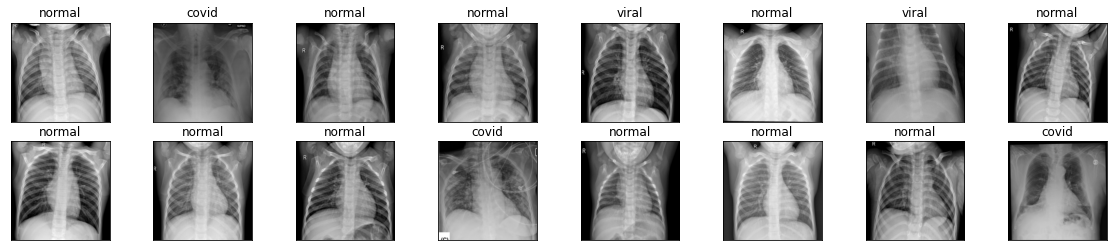

In [8]:
# obtain one batch of training images
images, labels = next(iter(train_loader))
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(20, 4))
for i in np.arange(16):
    ax = fig.add_subplot(2, 8, i+1, xticks=[], yticks=[])
    image = np.squeeze(np.transpose(images[i], (1, 2, 0)))  # B*C*H*W --> H*W*C
    # image = image * np.array((0.229, 0.224, 0.225)) + \
    #     np.array((0.485, 0.456, 0.406))  # un-normalize the image
    # image = image.clip(0, 1)  # clip the values between 0 and 1
    ax.imshow(image)
    ax.set_title(train_set.classes[labels[i].item()])

plt.show()
fig.savefig('images/train_samples.png', bbox_inches='tight')
plt.close()

In [9]:
torch.as_tensor(train_set.targets)  # tensor with correct class labels for train_set
# train_set.targets will return a rank 1 list with 2785 elements i.e., the indices of correct label

tensor([0, 0, 0,  ..., 2, 2, 2])

In [10]:
torch.as_tensor(test_set.targets)  # tensor with correct class labels for test_set
# test_set.targets will return a rank 1 list with 120 elements i.e., the indices of correct label

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
torch.as_tensor(train_set.targets).bincount()  # frequency of each class in train_set

tensor([ 179, 1301, 1305])

In [12]:
torch.as_tensor(test_set.targets).bincount()  # frequency of each class in test_set

tensor([40, 40, 40])